# Part 1 - Model Insights

# Code

In [211]:
## Adding folder above notebookt to path (for importing from CODE)
import os, sys
sys.path.append(os.path.abspath('../'))

## Automatically reload changed functions
%load_ext autoreload
%autoreload 2

# Custom Code used in lessons
import CODE
import CODE.lp_functions as lp

# Importing standard packages and viz styles
from CODE.standard_imports import *

# Function lp.show_code to see source code
lp.show_code(CODE.standard_imports)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```python
"""
Standard Imports module: lazy importing of essential packages

Example Use:
>> from CODE.standard_imports import *
"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

```

In [212]:
lp.show_code(CODE.lp_styles)
from CODE.lp_styles import *
# plt.rcParams['figure.figsize'] = (12, 8)

```python
import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

```

In [213]:
# Function for Showing Source Code in Markdown with Python Syntax
lp.show_code(lp.show_code)

```python
def show_code(function):
    """Display the source code of a funciton or module.
    Uses the inspect and IPython modules to display Markdown with Python Syntax. 
    Args:
        function (function or module object): Pass the function/module to show. 
                                              Use function name, no parentheses.
        
    Example Use:
    ## Example with Function
    >> import CODE.lp_functions as lp
    >> import scipy.stats as stats
    >> lp.show_code(stats.ttest_ind)  
    """
    
    import inspect 
    from IPython.display import display,Markdown
    
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))

```

In [214]:
## Preprocessing Imports ([ ] TO DO: Consider making preprocess_imports module)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import (make_column_transformer, make_column_selector, 
                             ColumnTransformer)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.base import clone

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats


## fixing random for lesson generation
np.random.seed(321)


In [215]:
## Load in data
FILE = "../Data/kc_house_data.csv"#"https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv"


df = pd.read_csv(FILE)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id             date        price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221,900.0000         3     1.0000         1180   
1  6414100192  20141209T000000 538,000.0000         3     2.2500         2570   
2  5631500400  20150225T000000 180,000.0000         2     1.0000          770   
3  2487200875  20141209T000000 604,000.0000         4     3.0000         1960   
4  1954400510  20150218T000000 510,000.0000         3     2.0000         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650  1.0000           0     0          3      7        1180   
1      7242  2.0000           0     0          3      7        2170   
2     10000  1.0000           0     0          3      6         770   
3      5000  1.0000           0     0          5      7        1050   
4      8080  1.0000           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode     lat      long  \
0              0      1955             0    98178 47.5112 -122.2570   
1            400      1951          1991    98125 47.7210 -122.3190   
2              0      1933             0    98028 47.7379 -122.2330   
3            910      1965             0    98136 47.5208 -122.3930   
4              0      1987             0    98074 47.6168 -122.0450   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [216]:
# # Date feature engineering 
# df['datetime'] = pd.to_datetime(df['date'])

# # df['Month'] =  df['datetime'].dt.month_name() 
# df['Month'] = df['datetime'].dt.month_name()
# df['Year'] = df['datetime'].dt.year

df = df.set_index('id')
df.head()

date        price  bedrooms  bathrooms  sqft_living  \
id                                                                           
7129300520  20141013T000000 221,900.0000         3     1.0000         1180   
6414100192  20141209T000000 538,000.0000         3     2.2500         2570   
5631500400  20150225T000000 180,000.0000         2     1.0000          770   
2487200875  20141209T000000 604,000.0000         4     3.0000         1960   
1954400510  20150218T000000 510,000.0000         3     2.0000         1680   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650  1.0000           0     0          3      7        1180   
6414100192      7242  2.0000           0     0          3      7        2170   
5631500400     10000  1.0000           0     0          3      6         770   
2487200875      5000  1.0000           0     0          5      7        1050   
1954400510      8080  1.0000           0     0          3      8        1680   

            sqft_basement  yr_built  yr_renovated  zipcode     lat      long  \
id                                                                             
7129300520              0      1955             0    98178 47.5112 -122.2570   
6414100192            400      1951          1991    98125 47.7210 -122.3190   
5631500400              0      1933             0    98028 47.7379 -122.2330   
2487200875            910      1965             0    98136 47.5208 -122.3930   
1954400510              0      1987             0    98074 47.6168 -122.0450   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

In [217]:
## Convert all categories to strings
CONVERT_TO_STR_COLS = ['zipcode']
df[CONVERT_TO_STR_COLS] = df[CONVERT_TO_STR_COLS].astype(str)

In [218]:
CONVERT_TO_NUM_COLS = []
for col in CONVERT_TO_NUM_COLS:
    df[col] = pd.to_numeric(df[col])

In [219]:
## Drop unwanted columns
DROP_COLS = ['date']#,'datetime','Year']
df_ml = df.drop(columns=DROP_COLS)
df_ml

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                            
7129300520 221,900.0000         3     1.0000         1180      5650  1.0000   
6414100192 538,000.0000         3     2.2500         2570      7242  2.0000   
5631500400 180,000.0000         2     1.0000          770     10000  1.0000   
2487200875 604,000.0000         4     3.0000         1960      5000  1.0000   
1954400510 510,000.0000         3     2.0000         1680      8080  1.0000   
...                 ...       ...        ...          ...       ...     ...   
263000018  360,000.0000         3     2.5000         1530      1131  3.0000   
6600060120 400,000.0000         4     2.5000         2310      5813  2.0000   
1523300141 402,101.0000         2     0.7500         1020      1350  2.0000   
291310100  400,000.0000         3     2.5000         1600      2388  2.0000   
1523300157 325,000.0000         2     0.7500         1020      1076  2.0000   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode     lat      long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178 47.5112 -122.2570           1340   
6414100192      1951          1991   98125 47.7210 -122.3190           1690   
5631500400      1933             0   98028 47.7379 -122.2330           2720   
2487200875      1965             0   98136 47.5208 -122.3930           1360   
1954400510      1987             0   98074 47.6168 -122.0450           1800   
...              ...           ...     ...     ...       ...            ...   
263000018       2009             0   98103 47.6993 -122.3460           1530   
6600060120      2014             0   98146 47.5107 -122.3620           1830   
1523300141      2009             0   98144 47.5944 -122.2990           1020   
291310100       2004             0   98027 47.5345 -122.0690           1410   
1523300157      2008             0   98144 47.5941 -122.2990           1020   

            sqft_lot15  
id                      
7129300520        5650  
6414100192        7639  
5631500400        8062  
2487200875        5000  
1954400510        7503  
...                ...  
263000018         1509  
6600060120        7200  
1523300141        2007  
291310100         1287  
1523300157        1357  

[21613 rows x 19 columns]

In [220]:
## final info before X/y
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  object 
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64

In [221]:
df_ml.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Removing Outliers (from target)

<AxesSubplot:xlabel='price'>

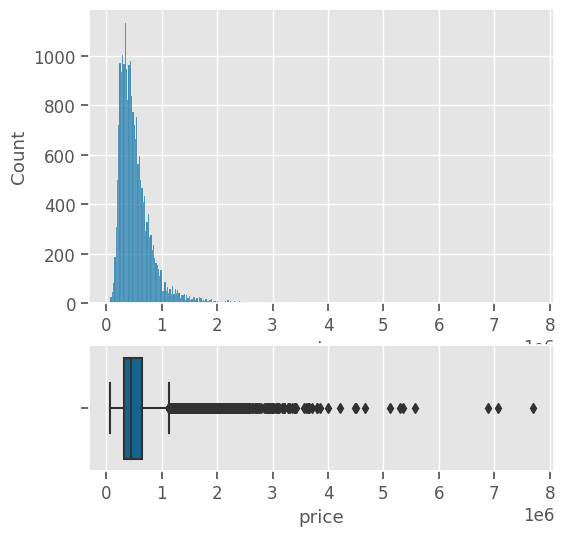

In [222]:
grid_spec = {'height_ratios':[0.7,0.3]}
fig, axes = plt.subplots(nrows=2, figsize=(6,6), gridspec_kw=grid_spec)

sns.histplot(data=df_ml, x='price',ax=axes[0])
sns.boxplot(data=df_ml, x='price',ax=axes[1])

In [223]:
import scipy.stats as stats
idx_outliers = np.abs(stats.zscore(df_ml['price']) )>3
idx_outliers.sum()

406

In [224]:
df_ml[~idx_outliers]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                            
7129300520 221,900.0000         3     1.0000         1180      5650  1.0000   
6414100192 538,000.0000         3     2.2500         2570      7242  2.0000   
5631500400 180,000.0000         2     1.0000          770     10000  1.0000   
2487200875 604,000.0000         4     3.0000         1960      5000  1.0000   
1954400510 510,000.0000         3     2.0000         1680      8080  1.0000   
...                 ...       ...        ...          ...       ...     ...   
263000018  360,000.0000         3     2.5000         1530      1131  3.0000   
6600060120 400,000.0000         4     2.5000         2310      5813  2.0000   
1523300141 402,101.0000         2     0.7500         1020      1350  2.0000   
291310100  400,000.0000         3     2.5000         1600      2388  2.0000   
1523300157 325,000.0000         2     0.7500         1020      1076  2.0000   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode     lat      long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178 47.5112 -122.2570           1340   
6414100192      1951          1991   98125 47.7210 -122.3190           1690   
5631500400      1933             0   98028 47.7379 -122.2330           2720   
2487200875      1965             0   98136 47.5208 -122.3930           1360   
1954400510      1987             0   98074 47.6168 -122.0450           1800   
...              ...           ...     ...     ...       ...            ...   
263000018       2009             0   98103 47.6993 -122.3460           1530   
6600060120      2014             0   98146 47.5107 -122.3620           1830   
1523300141      2009             0   98144 47.5944 -122.2990           1020   
291310100       2004             0   98027 47.5345 -122.0690           1410   
1523300157      2008             0   98144 47.5941 -122.2990           1020   

            sqft_lot15  
id                      
7129300520        5650  
6414100192        7639  
5631500400        8062  
2487200875        5000  
1954400510        7503  
...                ...  
263000018         1509  
6600060120        7200  
1523300141        2007  
291310100         1287  
1523300157        1357  

[21207 rows x 19 columns]

In [225]:
df_ml = df_ml[~idx_outliers].copy()
df_ml

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                            
7129300520 221,900.0000         3     1.0000         1180      5650  1.0000   
6414100192 538,000.0000         3     2.2500         2570      7242  2.0000   
5631500400 180,000.0000         2     1.0000          770     10000  1.0000   
2487200875 604,000.0000         4     3.0000         1960      5000  1.0000   
1954400510 510,000.0000         3     2.0000         1680      8080  1.0000   
...                 ...       ...        ...          ...       ...     ...   
263000018  360,000.0000         3     2.5000         1530      1131  3.0000   
6600060120 400,000.0000         4     2.5000         2310      5813  2.0000   
1523300141 402,101.0000         2     0.7500         1020      1350  2.0000   
291310100  400,000.0000         3     2.5000         1600      2388  2.0000   
1523300157 325,000.0000         2     0.7500         1020      1076  2.0000   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated zipcode     lat      long  sqft_living15  \
id                                                                            
7129300520      1955             0   98178 47.5112 -122.2570           1340   
6414100192      1951          1991   98125 47.7210 -122.3190           1690   
5631500400      1933             0   98028 47.7379 -122.2330           2720   
2487200875      1965             0   98136 47.5208 -122.3930           1360   
1954400510      1987             0   98074 47.6168 -122.0450           1800   
...              ...           ...     ...     ...       ...            ...   
263000018       2009             0   98103 47.6993 -122.3460           1530   
6600060120      2014             0   98146 47.5107 -122.3620           1830   
1523300141      2009             0   98144 47.5944 -122.2990           1020   
291310100       2004             0   98027 47.5345 -122.0690           1410   
1523300157      2008             0   98144 47.5941 -122.2990           1020   

            sqft_lot15  
id                      
7129300520        5650  
6414100192        7639  
5631500400        8062  
2487200875        5000  
1954400510        7503  
...                ...  
263000018         1509  
6600060120        7200  
1523300141        2007  
291310100         1287  
1523300157        1357  

[21207 rows x 19 columns]

<AxesSubplot:xlabel='price'>

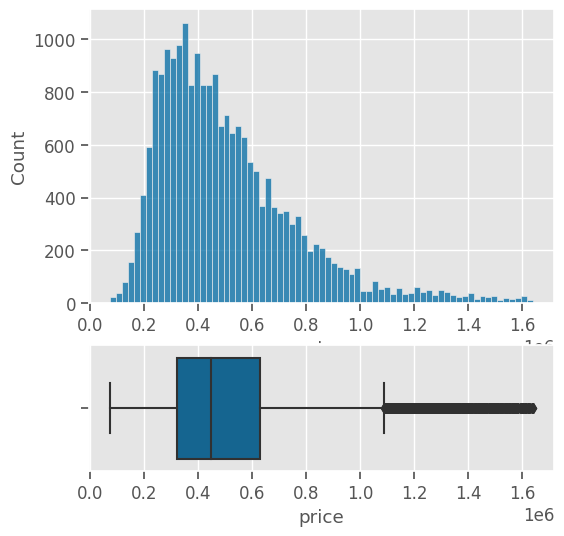

In [226]:
grid_spec = {'height_ratios':[0.7,0.3]}
fig, axes = plt.subplots(nrows=2, figsize=(6,6),gridspec_kw=grid_spec)

sns.histplot(data=df_ml, x='price',ax=axes[0])
sns.boxplot(data=df_ml, x='price',ax=axes[1])

In [227]:

df_ml['bedrooms'].describe()

count   21,207.0000
mean         3.3537
std          0.9214
min          0.0000
25%          3.0000
50%          3.0000
75%          4.0000
max         33.0000
Name: bedrooms, dtype: float64

In [228]:
df_ml = df_ml[df_ml['bedrooms'] <33]
df_ml.describe()

price    bedrooms   bathrooms  sqft_living       sqft_lot  \
count    21,206.0000 21,206.0000 21,206.0000  21,206.0000    21,206.0000   
mean    506,838.9394      3.3523      2.0865   2,032.1114    14,835.0561   
std     259,330.2711      0.8986      0.7373     837.1687    40,410.9058   
min      75,000.0000      0.0000      0.0000     290.0000       520.0000   
25%     320,000.0000      3.0000      1.5000   1,410.0000     5,005.0000   
50%     446,975.0000      3.0000      2.2500   1,890.0000     7,560.0000   
75%     627,187.5000      4.0000      2.5000   2,500.0000    10,492.0000   
max   1,640,000.0000     11.0000      7.5000   7,480.0000 1,651,359.0000   

           floors  waterfront        view   condition       grade  sqft_above  \
count 21,206.0000 21,206.0000 21,206.0000 21,206.0000 21,206.0000 21,206.0000   
mean       1.4871      0.0043      0.2056      3.4076      7.6043  1,751.3504   
std        0.5386      0.0657      0.7080      0.6490      1.1114    772.6039   
min        1.0000      0.0000      0.0000      1.0000      1.0000    290.0000   
25%        1.0000      0.0000      0.0000      3.0000      7.0000  1,180.0000   
50%        1.0000      0.0000      0.0000      3.0000      7.0000  1,540.0000   
75%        2.0000      0.0000      0.0000      4.0000      8.0000  2,170.0000   
max        3.5000      1.0000      4.0000      5.0000     12.0000  7,320.0000   

       sqft_basement    yr_built  yr_renovated         lat        long  \
count    21,206.0000 21,206.0000   21,206.0000 21,206.0000 21,206.0000   
mean        280.7611  1,970.9333       80.0870     47.5589   -122.2136   
std         425.3649     29.2837      391.7034      0.1395      0.1415   
min           0.0000  1,900.0000        0.0000     47.1559   -122.5190   
25%           0.0000  1,951.2500        0.0000     47.4670   -122.3290   
50%           0.0000  1,975.0000        0.0000     47.5699   -122.2310   
75%         540.0000  1,996.0000        0.0000     47.6787   -122.1240   
max       2,850.0000  2,015.0000    2,015.0000     47.7776   -121.3150   

       sqft_living15   sqft_lot15  
count    21,206.0000  21,206.0000  
mean      1,960.3690  12,642.5575  
std         655.3448  27,224.8501  
min         399.0000     651.0000  
25%       1,480.0000   5,080.0000  
50%       1,820.0000   7,577.0000  
75%       2,330.0000  10,000.0000  
max       5,790.0000 871,200.0000

In [229]:
df_ml[df_ml['bathrooms'] >6]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                              
9175600025   800,000.0000         7     6.7500         7480     41664  2.0000   
424049043    450,000.0000         9     7.5000         4050      6504  2.0000   
424069279  1,180,000.0000         6     6.5000         6260     10955  2.0000   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
9175600025           0     2          3     11        5080           2400   
424049043            0     0          3      7        4050              0   
424069279            0     0          3     11        4840           1420   

            yr_built  yr_renovated zipcode     lat      long  sqft_living15  \
id                                                                            
9175600025      1953             0   98166 47.4643 -122.3680           2810   
424049043       1996             0   98144 47.5923 -122.3010           1448   
424069279       2007             0   98075 47.5947 -122.0390           2710   

            sqft_lot15  
id                      
9175600025       33190  
424049043         3866  
424069279        12550

## Preprocessing with Scikit-Learn 1.1+

In [230]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


### Preprocessing + ColumnTransformer


In [231]:
## Make x and y variables
target = 'price'
drop_cols_model = []

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
2895600090         3     1.0000         1120      7320  1.0000           0   
8563000110         4     1.7500         1460      9750  1.0000           0   
2591800340         3     2.2500         1820      7420  2.0000           0   
7215721330         3     2.5000         1650      4218  2.0000           0   
7502800030         4     2.7500         3550      9400  2.0000           0   

            view  condition  grade  sqft_above  sqft_basement  yr_built  \
id                                                                        
2895600090     0          4      7        1120              0      1954   
8563000110     0          4      7        1460              0      1967   
2591800340     0          4      8        1820              0      1983   
7215721330     0          3      8        1650              0      2000   
7502800030     0          3      9        3550              0      2014   

            yr_renovated zipcode     lat      long  sqft_living15  sqft_lot15  
id                                                                             
2895600090             0   98146 47.5103 -122.3820           1410        6328  
8563000110             0   98008 47.6205 -122.1020           1820        9840  
2591800340             0   98058 47.4368 -122.1620           1900        7526  
7215721330             0   98075 47.5998 -122.0160           1650        4559  
7502800030             0   98059 47.4827 -122.1310           3550        9421

In [232]:
## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore',
                                       sparse=False) )
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [233]:
## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

>- Note: So far, all of the code should be familiar to you. 
    -  With sklearn v1.1+, you should always add `verbose_feature_names_out=False` to column transformers *`ColumnTransformer`/ `make_column_transformer`)
        - (If you want to see what the verbose version looks like feel free to give it a try!)

In [234]:
## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x2df6926a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x17f030970>)],
                  verbose_feature_names_out=False)

In [235]:
## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98

In [236]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
7502800030    4.0000     2.7500   3,550.0000  9,400.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

             view  condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                          
2895600090 0.0000     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110 0.0000     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340 0.0000     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330 0.0000     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
7502800030 0.0000     3.0000 9.0000  3,550.0000         0.0000 2,014.0000   
...           ...        ...    ...         ...            ...        ...   
3211200140 0.0000     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155 0.0000     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695 0.0000     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206 0.0000     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010  0.0000     3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated     lat      long  sqft_living15  sqft_lot15  \
id                                                                      
2895600090        0.0000 47.5103 -122.3820     1,410.0000  6,328.0000   
8563000110        0.0000 47.6205 -122.1020     1,820.0000  9,840.0000   
2591800340        0.0000 47.4368 -122.1620     1,900.0000  7,526.0000   
7215721330        0.0000 47.5998 -122.0160     1,650.0000  4,559.0000   
7502800030        0.0000 47.4827 -122.1310     3,550.0000  9,421.0000   
...                  ...     ...       ...            ...         ...   
3211200140        0.0000 47.7307 -122.2390     1,250.0000  7,210.0000   
6381502155        0.0000 47.7276 -122.3070     1,280.0000  7,200.0000   
8964800695        0.0000 47.6204 -122.2170     2,230.0000 11,900.0000   
2320069206        0.0000 47.2092 -121.9970     1,250.0000  8,792.0000   
624100010         0.0000 47.7234 -122.0660     3,160.0000 20,492.0000   

            zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
id                                                                       
2895600090         0.0000         0.0000         0.0000         0.0000   
8563000110         0.0000         0.0000         0.0000         0.0000   
2591800340         0.0000         0.0000         0.0000         0.0000   
7215721330         0.0000         0.0000         0.0000         0.0000   
7502800030         0.0000         0.0000         0.0000         0.0000   
...                   ...            ...            ...            ...   
3211200140         0.0000         0.0000         0.0000         0.0000   
6381502155         0.0000         0.0000         0.0000         0.0000   
8964800695         0.0000         0.0000         0.0000         1.0000   
2320069206         0.0000         0.0000         0.0000         0.0000   
624100010          0.0000         0.0000         0.0000         0.0000   

            zipcode_98005  zipcode_98006  zipcode_98007 

In [237]:
## Customization Options
pd.set_option("display.max_columns",100)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
7502800030    4.0000     2.7500   3,550.0000  9,400.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

             view  condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                          
2895600090 0.0000     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110 0.0000     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340 0.0000     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330 0.0000     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
7502800030 0.0000     3.0000 9.0000  3,550.0000         0.0000 2,014.0000   
...           ...        ...    ...         ...            ...        ...   
3211200140 0.0000     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155 0.0000     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695 0.0000     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206 0.0000     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010  0.0000     3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated     lat      long  sqft_living15  sqft_lot15  \
id                                                                      
2895600090        0.0000 47.5103 -122.3820     1,410.0000  6,328.0000   
8563000110        0.0000 47.6205 -122.1020     1,820.0000  9,840.0000   
2591800340        0.0000 47.4368 -122.1620     1,900.0000  7,526.0000   
7215721330        0.0000 47.5998 -122.0160     1,650.0000  4,559.0000   
7502800030        0.0000 47.4827 -122.1310     3,550.0000  9,421.0000   
...                  ...     ...       ...            ...         ...   
3211200140        0.0000 47.7307 -122.2390     1,250.0000  7,210.0000   
6381502155        0.0000 47.7276 -122.3070     1,280.0000  7,200.0000   
8964800695        0.0000 47.6204 -122.2170     2,230.0000 11,900.0000   
2320069206        0.0000 47.2092 -121.9970     1,250.0000  8,792.0000   
624100010         0.0000 47.7234 -122.0660     3,160.0000 20,492.0000   

            zipcode_98001  zipcode_98002  zipcode_98003  zipcode_98004  \
id                                                                       
2895600090         0.0000         0.0000         0.0000         0.0000   
8563000110         0.0000         0.0000         0.0000         0.0000   
2591800340         0.0000         0.0000         0.0000         0.0000   
7215721330         0.0000         0.0000         0.0000         0.0000   
7502800030         0.0000         0.0000         0.0000         0.0000   
...                   ...            ...            ...            ...   
3211200140         0.0000         0.0000         0.0000         0.0000   
6381502155         0.0000         0.0000         0.0000         0.0000   
8964800695         0.0000         0.0000         0.0000         1.0000   
2320069206         0.0000         0.0000         0.0000         0.0000   
624100010          0.0000         0.0000         0.0000         0.0000   

            zipcode_98005  zipcode_98006  zipcode_98007 

In [238]:
# def evaluate_regression(model, X_train,y_train, X_test, y_test): 
#     """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
#     ## Training Data
#     y_pred_train = model.predict(X_train)
#     r2_train = metrics.r2_score(y_train, y_pred_train)
#     rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
#                                             squared=False)
#     mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    
#     print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        
    
#     ## Test Data
#     y_pred_test = model.predict(X_test)
#     r2_test = metrics.r2_score(y_test, y_pred_test)
#     rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
#                                             squared=False)
#     mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

#     print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")


In [239]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
#         print(f"Train R^2 = {r2_train:,.2f}")#"\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
#         print(f"Test R^2 = {r2_test:,.2f}")#"\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")
#         print()
#         print(f"Train RMSE = {rmse_train:,.2f}")
#         print(f"Test RMSE = {rmse_test:,.2f}")
#         print()
#         print(f"Train MAE = {mae_train:,.2f}")
#         print(f"Test MAE = {mae_test:,.2f}")
        
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")


### Linear Regression

In [240]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, 
                    X_test_df, y_test)

In [241]:
reg.coef_

array([-1.05021635e+04,  1.57225436e+04,  6.05474449e+11,  2.90551195e-01,
       -2.03263182e+04,  2.40838160e+05,  4.42817465e+04,  2.54186537e+04,
        5.30051666e+04, -6.05474449e+11, -6.05474449e+11, -5.46154672e+02,
        2.10943812e+01,  1.62619102e+05, -4.59670967e+04,  3.38181316e+01,
       -5.35951855e-02, -2.48142986e+08, -2.48129014e+08, -2.48161177e+08,
       -2.47579267e+08, -2.47880239e+08, -2.47906240e+08, -2.47935502e+08,
       -2.47949994e+08, -2.48049619e+08, -2.48086336e+08, -2.48087746e+08,
       -2.48104240e+08, -2.48129323e+08, -2.48174986e+08, -2.48017890e+08,
       -2.47984243e+08, -2.48087654e+08, -2.47957632e+08, -2.48145585e+08,
       -2.48146887e+08, -2.48159059e+08, -2.47848135e+08, -2.48019018e+08,
       -2.48108259e+08, -2.47409806e+08, -2.47710492e+08, -2.48142172e+08,
       -2.48042805e+08, -2.47950771e+08, -2.47969923e+08, -2.48120897e+08,
       -2.48073963e+08, -2.48130770e+08, -2.48068622e+08, -2.48053920e+08,
       -2.48071876e+08, -

In [242]:
reg.intercept_

235443775.57893348

In [243]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
coeffs

bedrooms                 -10,502.1635
bathrooms                 15,722.5436
sqft_living      605,474,448,954.2510
sqft_lot                       0.2906
floors                   -20,326.3182
waterfront               240,838.1601
view                      44,281.7465
condition                 25,418.6537
grade                     53,005.1666
sqft_above      -605,474,448,822.4048
sqft_basement   -605,474,448,872.8506
yr_built                    -546.1547
yr_renovated                  21.0944
lat                      162,619.1022
long                     -45,967.0967
sqft_living15                 33.8181
sqft_lot15                    -0.0536
zipcode_98001       -248,142,986.0302
zipcode_98002       -248,129,014.1788
zipcode_98003       -248,161,177.0118
zipcode_98004       -247,579,266.7485
zipcode_98005       -247,880,239.3415
zipcode_98006       -247,906,240.4852
zipcode_98007       -247,935,501.8269
zipcode_98008       -247,949,993.7232
zipcode_98010       -248,049,618.7252
zipcode_9801

In [244]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', 100)

In [245]:
coeffs

bedrooms                 -10,502.1635
bathrooms                 15,722.5436
sqft_living      605,474,448,954.2510
sqft_lot                       0.2906
floors                   -20,326.3182
waterfront               240,838.1601
view                      44,281.7465
condition                 25,418.6537
grade                     53,005.1666
sqft_above      -605,474,448,822.4048
sqft_basement   -605,474,448,872.8506
yr_built                    -546.1547
yr_renovated                  21.0944
lat                      162,619.1022
long                     -45,967.0967
sqft_living15                 33.8181
sqft_lot15                    -0.0536
zipcode_98001       -248,142,986.0302
zipcode_98002       -248,129,014.1788
zipcode_98003       -248,161,177.0118
zipcode_98004       -247,579,266.7485
zipcode_98005       -247,880,239.3415
zipcode_98006       -247,906,240.4852
zipcode_98007       -247,935,501.8269
zipcode_98008       -247,949,993.7232
zipcode_98010       -248,049,618.7252
zipcode_9801

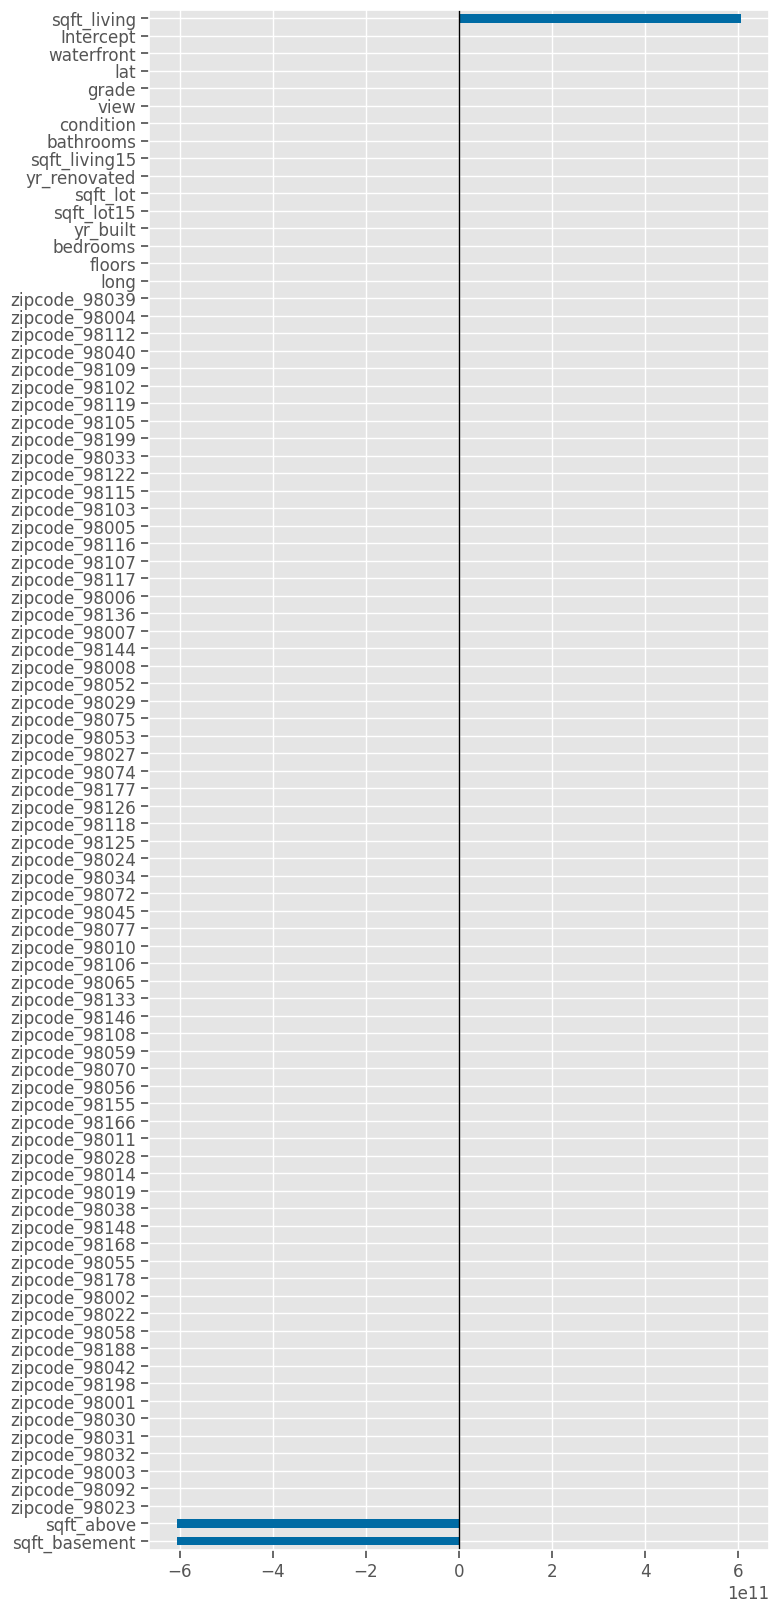

In [246]:
# with sns.plotting_context('notebook'):
ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
ax.axvline(0,color='k', lw=1)

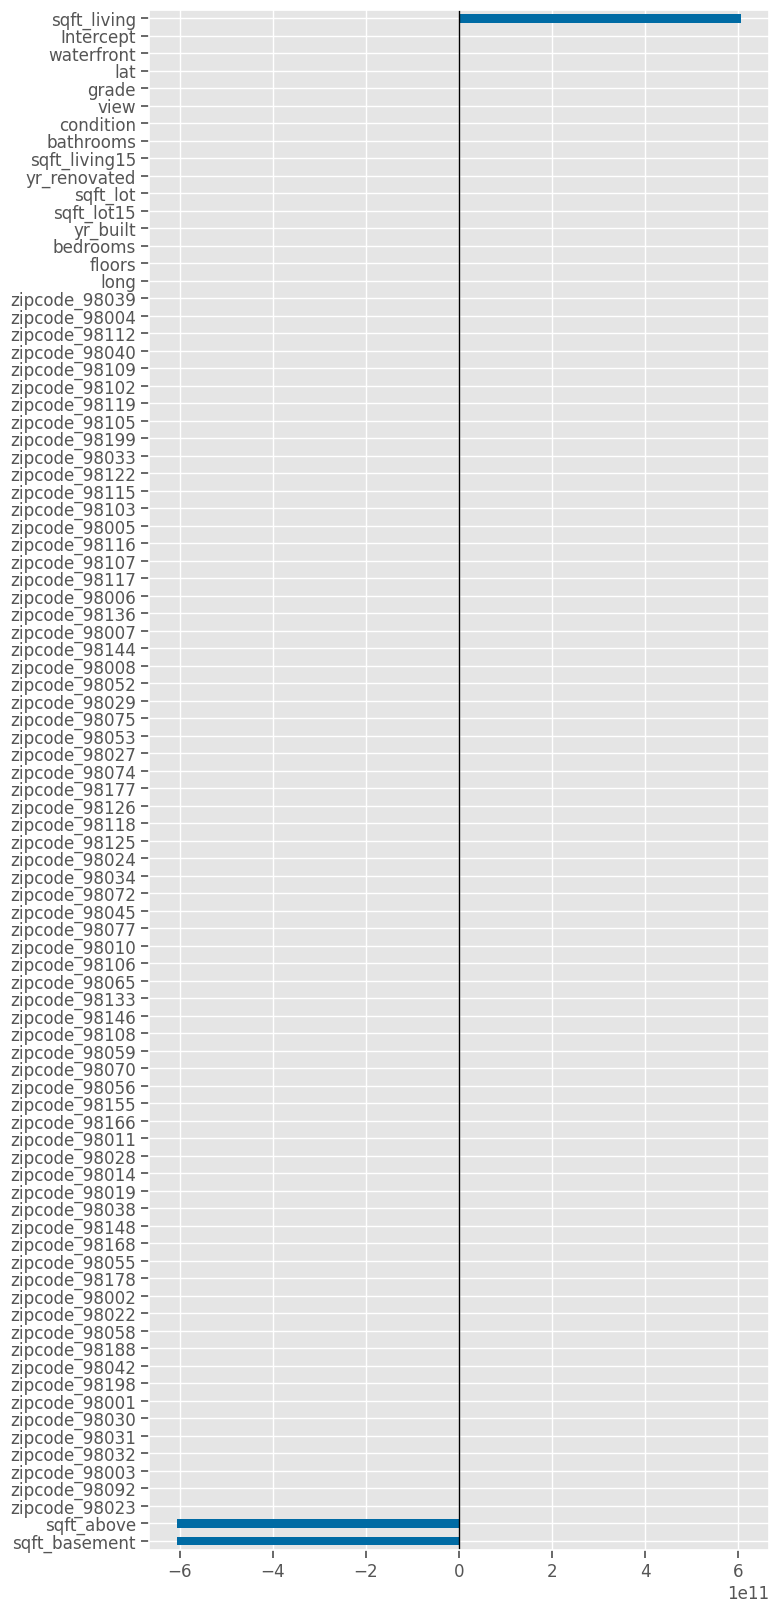

In [247]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
ax.axvline(0,color='k', lw=1)

In [248]:
coeffs

bedrooms                 -10,502.1635
bathrooms                 15,722.5436
sqft_living      605,474,448,954.2510
sqft_lot                       0.2906
floors                   -20,326.3182
waterfront               240,838.1601
view                      44,281.7465
condition                 25,418.6537
grade                     53,005.1666
sqft_above      -605,474,448,822.4048
sqft_basement   -605,474,448,872.8506
yr_built                    -546.1547
yr_renovated                  21.0944
lat                      162,619.1022
long                     -45,967.0967
sqft_living15                 33.8181
sqft_lot15                    -0.0536
zipcode_98001       -248,142,986.0302
zipcode_98002       -248,129,014.1788
zipcode_98003       -248,161,177.0118
zipcode_98004       -247,579,266.7485
zipcode_98005       -247,880,239.3415
zipcode_98006       -247,906,240.4852
zipcode_98007       -247,935,501.8269
zipcode_98008       -247,949,993.7232
zipcode_98010       -248,049,618.7252
zipcode_9801

### Multicollinearity & One Hot Encoding

In [249]:
pd.options.display.max_rows

100

In [250]:
df_ml.select_dtypes('object').nunique()

zipcode    70
dtype: int64

## UPDATE THIS
- Here is where we should consider our final use case for this data. If we want to explain student performance, there is no benefit to one-hot-encoding both categories.
- We know that if someone has a 0 for "paid_yes," that it means "paid_no" would be 1.
- To remove these unnecessary columns, we can change our arguments for our OneHotEncoder in our pipeline and add "drop='if_binary'" or "drop='first'/'last' to automatically drop one of the categories to reduce multicollinearity.
- HOWEVER, we cannot use BOTH handle_unknown AND the drop argument together. We will get an error message.
Since our current modeling will be used to extract insights for our stakeholders and will not be deployed to the cloud where it will run predictions on new data, we can safely switch to using the drop='if_binary' option.

In [251]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=15
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
7502800030    4.0000     2.7500   3,550.0000  9,400.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

             view  condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                          
2895600090 0.0000     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110 0.0000     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340 0.0000     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330 0.0000     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
7502800030 0.0000     3.0000 9.0000  3,550.0000         0.0000 2,014.0000   
...           ...        ...    ...         ...            ...        ...   
3211200140 0.0000     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155 0.0000     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695 0.0000     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206 0.0000     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010  0.0000     3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated  sqft_living15  sqft_lot15  
id                                                   
2895600090        0.0000     1,410.0000  6,328.0000  
8563000110        0.0000     1,820.0000  9,840.0000  
2591800340        0.0000     1,900.0000  7,526.0000  
7215721330        0.0000     1,650.0000  4,559.0000  
7502800030        0.0000     3,550.0000  9,421.0000  
...                  ...            ...         ...  
3211200140        0.0000     1,250.0000  7,210.0000  
6381502155        0.0000     1,280.0000  7,200.0000  
8964800695        0.0000     2,230.0000 11,900.0000  
2320069206        0.0000     1,250.0000  8,792.0000  
624100010         0.0000     3,160.0000 20,492.0000  

[15904 rows x 15 columns]

In [252]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

In [253]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
coeffs

bedrooms          -20,706.5344
bathrooms          30,075.4922
sqft_living            60.3081
sqft_lot                0.1253
floors             55,449.2494
waterfront        150,011.3959
view               33,485.5553
condition          19,587.6197
grade             108,423.2786
sqft_above             12.1330
sqft_basement          48.1751
yr_built           -3,013.2481
yr_renovated           12.5567
sqft_living15          56.0368
sqft_lot15             -0.3645
Intercept       5,206,158.1896
dtype: float64

In [254]:
def get_coeffs(reg):
    """Save the coefficients and intercept from a linear regression model
    as a Pandas Series"""
    ## Saving the coefficients
    coeffs = pd.Series(reg.coef_, index= reg.feature_names_in_)
    coeffs.loc['Intercept'] = reg.intercept_
    return coeffs

In [255]:
def plot_coeffs(coeffs, figsize=(6,5), intercept=True,
                intercept_name="Intercept", sort_values=True,
                ascending=True, ax=None, title='Regression Coefficients'):
    
    ## Make function get coeffs if coeffs in not series
    if isinstance(coeffs, pd.Series) == False:
        coeffs = get_coeffs(coeffs)
        
    if (intercept==False):
        if intercept_name in coeffs:
            coeffs_plot = coeffs.drop(intercept_name).copy()
        else: 
            raise Exception(f"{intercept_name} not found.")
    else:
        coeffs_plot=coeffs.copy()
    
    if sort_values:
        coeffs_plot = coeffs_plot.sort_values(ascending=ascending)
        
    if ax is None:
        
        ax = coeffs_plot.plot(kind='barh',figsize=figsize)
    else:
        coeffs_plot.plot(kind='barh',ax=ax)
        
    ax.axvline(0,color='k', lw=1)
    ax.set(ylabel='Feature Name',xlabel='Coefficient',title=title)
#     plt.tight_layout()
    return ax

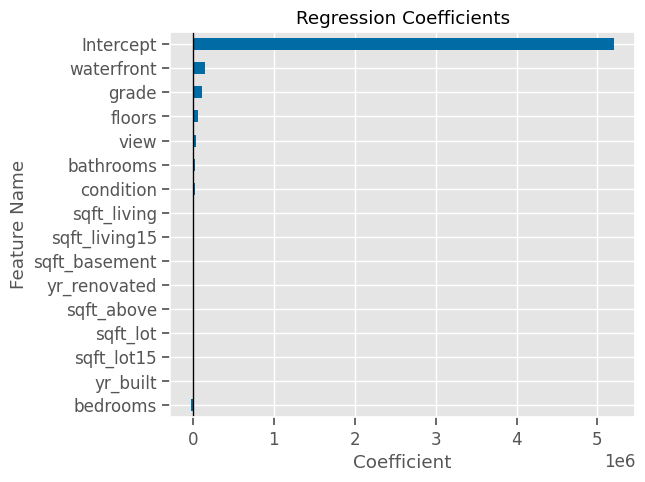

In [256]:
ax = plot_coeffs(reg)

### Tick Formatting

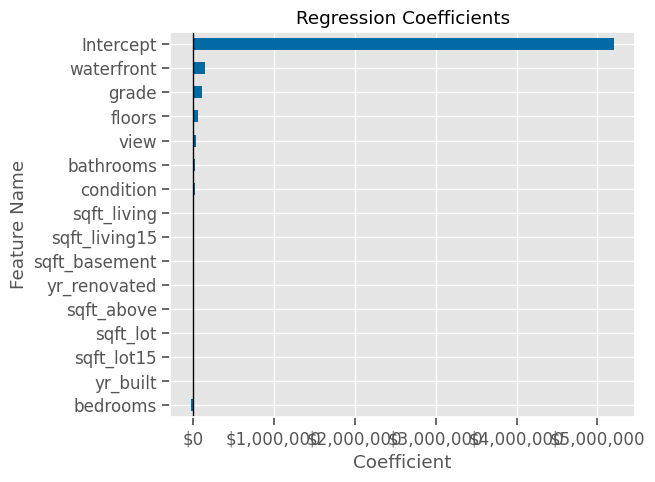

In [257]:
from matplotlib import ticker

ax = plot_coeffs(coeffs)

price_fmt = ticker.StrMethodFormatter("${x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)

In [258]:
## Make a "hundred_thousands" function 
def hundred_thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}k"

price_fmt_thous = ticker.FuncFormatter(hundred_thousands)

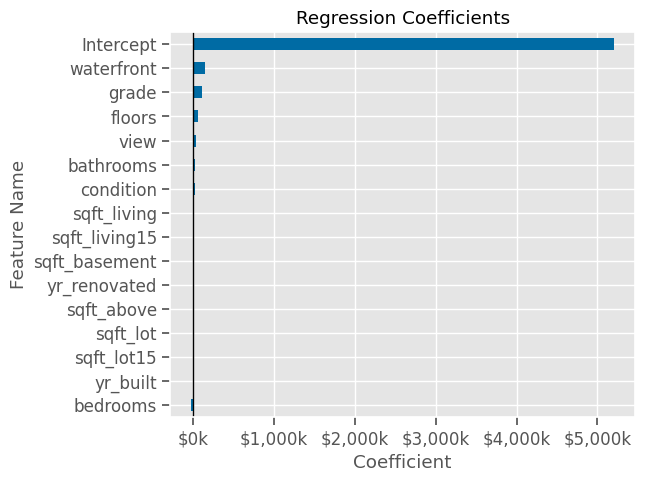

In [259]:
ax = plot_coeffs(coeffs)
ax.xaxis.set_major_formatter(price_fmt_thous)

## Effect of Scaling on Coefficients

In [260]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
                         StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
id                                                                           
2895600090   -0.3858    -1.4718      -1.0873   -0.1810 -0.9053     -0.0626   
8563000110    0.7217    -0.4557      -0.6796   -0.1207 -0.9053     -0.0626   
2591800340   -0.3858     0.2218      -0.2480   -0.1785  0.9468     -0.0626   
7215721330   -0.3858     0.5605      -0.4518   -0.2579  0.9468     -0.0626   
7502800030    0.7217     0.8992       1.8262   -0.1294  0.9468     -0.0626   
...              ...        ...          ...       ...     ...         ...   
3211200140    0.7217    -0.1169      -0.3679   -0.1837 -0.9053     -0.0626   
6381502155   -0.3858    -1.4718      -0.6436   -0.1840 -0.9053     -0.0626   
8964800695   -0.3858    -0.4557       0.2436   -0.0269 -0.9053     -0.0626   
2320069206   -0.3858    -1.4718      -0.9314   -0.1573  0.0208     -0.0626   
624100010    -0.3858     0.5605       1.0829    0.1311  0.0208     -0.0626   

            condition   grade  sqft_above  sqft_basement  yr_built  \
id                                                                   
2895600090     0.9108 -0.5435     -0.8153        -0.6583   -0.5816   
8563000110     0.9108 -0.5435     -0.3744        -0.6583   -0.1372   
2591800340     0.9108  0.3601      0.0925        -0.6583    0.4097   
7215721330    -0.6303  0.3601     -0.1280        -0.6583    0.9908   
7502800030    -0.6303  1.2638      2.3360        -0.6583    1.4693   
...               ...     ...         ...            ...       ...   
3211200140    -0.6303 -0.5435     -1.1525         1.3771   -0.0005   
6381502155    -0.6303 -0.5435     -0.3355        -0.6583   -0.5816   
8964800695    -0.6303  1.2638      0.6242        -0.6583   -0.7525   
2320069206     2.4519 -1.4472     -0.6467        -0.6583   -1.0943   
624100010     -0.6303  1.2638      1.5320        -0.6583    0.4097   

            yr_renovated  sqft_living15  sqft_lot15  
id                                                   
2895600090       -0.2049        -0.8386     -0.2285  
8563000110       -0.2049        -0.2078     -0.0970  
2591800340       -0.2049        -0.0847     -0.1837  
7215721330       -0.2049        -0.4693     -0.2948  
7502800030       -0.2049         2.4540     -0.1127  
...                  ...            ...         ...  
3211200140       -0.2049        -1.0848     -0.1955  
6381502155       -0.2049        -1.0386     -0.1959  
8964800695       -0.2049         0.4230     -0.0198  
2320069206       -0.2049        -1.0848     -0.1362  
624100010        -0.2049         1.8539      0.3021  

[15904 rows x 14 columns]

In [261]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

<AxesSubplot:title={'center':'Regression Coefficients'}, xlabel='Coefficient', ylabel='Feature Name'>

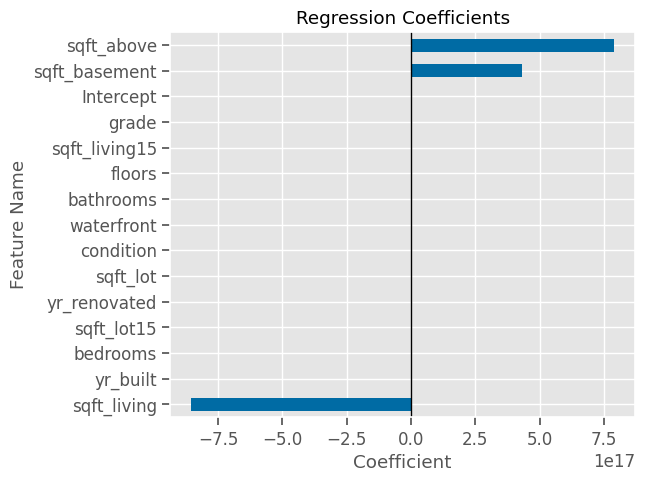

In [262]:
plot_coeffs(reg)

In [263]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode']#,'Month','lat','long','Year','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )

## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )

### Sklearn Updates Screenshots

In [264]:
## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x2dfece9a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x2dfffa2b0>)],
                  verbose_feature_names_out=False)

In [265]:
## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], dtype=object)

In [266]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
7502800030    4.0000     2.7500   3,550.0000  9,400.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

             view  condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                          
2895600090 0.0000     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110 0.0000     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340 0.0000     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330 0.0000     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
7502800030 0.0000     3.0000 9.0000  3,550.0000         0.0000 2,014.0000   
...           ...        ...    ...         ...            ...        ...   
3211200140 0.0000     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155 0.0000     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695 0.0000     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206 0.0000     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010  0.0000     3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated     lat      long  sqft_living15  sqft_lot15  
id                                                                     
2895600090        0.0000 47.5103 -122.3820     1,410.0000  6,328.0000  
8563000110        0.0000 47.6205 -122.1020     1,820.0000  9,840.0000  
2591800340        0.0000 47.4368 -122.1620     1,900.0000  7,526.0000  
7215721330        0.0000 47.5998 -122.0160     1,650.0000  4,559.0000  
7502800030        0.0000 47.4827 -122.1310     3,550.0000  9,421.0000  
...                  ...     ...       ...            ...         ...  
3211200140        0.0000 47.7307 -122.2390     1,250.0000  7,210.0000  
6381502155        0.0000 47.7276 -122.3070     1,280.0000  7,200.0000  
8964800695        0.0000 47.6204 -122.2170     2,230.0000 11,900.0000  
2320069206        0.0000 47.2092 -121.9970     1,250.0000  8,792.0000  
624100010         0.0000 47.7234 -122.0660     3,160.0000 20,492.0000  

[15904 rows x 17 columns]

### Sklearn Updates Screenshots 2

In [267]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)

LinearRegression()

In [268]:
# Feature Names are saved
reg.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], dtype=object)

In [269]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
# ax = coeffs.sort_values().plot(kind='barh')#,figsize=(6,4))
# ax.axvline(0,color='k', lw=1)
coeffs

bedrooms        -16,195.4476
bathrooms        29,725.1959
sqft_living          59.5155
sqft_lot              0.1573
floors           43,991.7833
waterfront      188,149.2378
view             43,163.1229
condition        24,777.8254
grade            95,818.7061
sqft_above           20.2234
sqft_basement        39.2921
yr_built         -2,633.1933
yr_renovated         15.8283
lat             487,652.3602
long            152,523.9813
sqft_living15        42.3656
sqft_lot15           -0.3424
Intercept             0.0000
dtype: float64

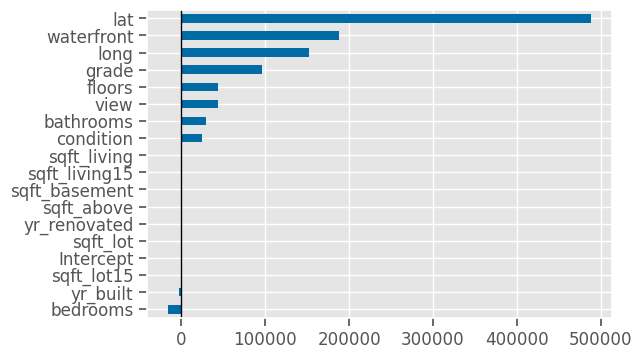

In [270]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,4))
ax.axvline(0,color='k', lw=1)

# APPENDIX: FOR SLIDES

In [271]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

bedrooms  bathrooms  sqft_living    sqft_lot  floors  waterfront  \
id                                                                             
2895600090    3.0000     1.0000   1,120.0000  7,320.0000  1.0000      0.0000   
8563000110    4.0000     1.7500   1,460.0000  9,750.0000  1.0000      0.0000   
2591800340    3.0000     2.2500   1,820.0000  7,420.0000  2.0000      0.0000   
7215721330    3.0000     2.5000   1,650.0000  4,218.0000  2.0000      0.0000   
7502800030    4.0000     2.7500   3,550.0000  9,400.0000  2.0000      0.0000   
...              ...        ...          ...         ...     ...         ...   
3211200140    4.0000     2.0000   1,720.0000  7,210.0000  1.0000      0.0000   
6381502155    3.0000     1.0000   1,490.0000  7,200.0000  1.0000      0.0000   
8964800695    3.0000     1.7500   2,230.0000 13,529.0000  1.0000      0.0000   
2320069206    3.0000     1.0000   1,250.0000  8,276.0000  1.5000      0.0000   
624100010     3.0000     2.5000   2,930.0000 19,900.0000  1.5000      0.0000   

            condition  grade  sqft_above  sqft_basement   yr_built  \
id                                                                   
2895600090     4.0000 7.0000  1,120.0000         0.0000 1,954.0000   
8563000110     4.0000 7.0000  1,460.0000         0.0000 1,967.0000   
2591800340     4.0000 8.0000  1,820.0000         0.0000 1,983.0000   
7215721330     3.0000 8.0000  1,650.0000         0.0000 2,000.0000   
7502800030     3.0000 9.0000  3,550.0000         0.0000 2,014.0000   
...               ...    ...         ...            ...        ...   
3211200140     3.0000 7.0000    860.0000       860.0000 1,971.0000   
6381502155     3.0000 7.0000  1,490.0000         0.0000 1,954.0000   
8964800695     3.0000 9.0000  2,230.0000         0.0000 1,949.0000   
2320069206     5.0000 6.0000  1,250.0000         0.0000 1,939.0000   
624100010      3.0000 9.0000  2,930.0000         0.0000 1,983.0000   

            yr_renovated  sqft_living15  sqft_lot15  
id                                                   
2895600090        0.0000     1,410.0000  6,328.0000  
8563000110        0.0000     1,820.0000  9,840.0000  
2591800340        0.0000     1,900.0000  7,526.0000  
7215721330        0.0000     1,650.0000  4,559.0000  
7502800030        0.0000     3,550.0000  9,421.0000  
...                  ...            ...         ...  
3211200140        0.0000     1,250.0000  7,210.0000  
6381502155        0.0000     1,280.0000  7,200.0000  
8964800695        0.0000     2,230.0000 11,900.0000  
2320069206        0.0000     1,250.0000  8,792.0000  
624100010         0.0000     3,160.0000 20,492.0000  

[15904 rows x 14 columns]

# LIN REG SLIDE IMAGES & MODELS

### Raw

In [272]:
slide_reg_cols = ['bathrooms','bedrooms','sqft_living','yr_built','waterfront',
                 'floors'
                 ]
## Make x and y variables
target = 'price'
# drop_cols_model = ['zipcode','lat','long','view']

y = df_ml[target].copy()
X = df_ml[slide_reg_cols].copy()#.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')


num_pipe_raw = make_pipeline( SimpleImputer(strategy='median'))


## make the preprocessing column transformer
preprocessor_raw = make_column_transformer( (num_pipe_raw, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)


## Get feature names
preprocessor_raw.fit(X_train)
feature_names_raw = preprocessor_raw.get_feature_names_out()




### PREP ALL X VARS
## Prepare X_train_df
X_train_raw = pd.DataFrame( preprocessor_raw.transform(X_train), 
                          columns = feature_names_raw,
                         index = X_train.index)

## Prepare X_test_df
X_test_raw = pd.DataFrame( preprocessor_raw.transform(X_test),
                          columns = feature_names_raw,
                         index=X_test.index)
X_train_raw

bathrooms  bedrooms  sqft_living   yr_built  waterfront  floors
id                                                                         
2895600090     1.0000    3.0000   1,120.0000 1,954.0000      0.0000  1.0000
8563000110     1.7500    4.0000   1,460.0000 1,967.0000      0.0000  1.0000
2591800340     2.2500    3.0000   1,820.0000 1,983.0000      0.0000  2.0000
7215721330     2.5000    3.0000   1,650.0000 2,000.0000      0.0000  2.0000
7502800030     2.7500    4.0000   3,550.0000 2,014.0000      0.0000  2.0000
...               ...       ...          ...        ...         ...     ...
3211200140     2.0000    4.0000   1,720.0000 1,971.0000      0.0000  1.0000
6381502155     1.0000    3.0000   1,490.0000 1,954.0000      0.0000  1.0000
8964800695     1.7500    3.0000   2,230.0000 1,949.0000      0.0000  1.0000
2320069206     1.0000    3.0000   1,250.0000 1,939.0000      0.0000  1.5000
624100010      2.5000    3.0000   2,930.0000 1,983.0000      0.0000  1.5000

[15904 rows x 6 columns]

### SLIDE IMAGES: Individual Regplots

In [273]:
plot_df = pd.concat([X_train_raw, y_train], axis=1)
plot_df

bathrooms  bedrooms  sqft_living   yr_built  waterfront  floors  \
id                                                                            
2895600090     1.0000    3.0000   1,120.0000 1,954.0000      0.0000  1.0000   
8563000110     1.7500    4.0000   1,460.0000 1,967.0000      0.0000  1.0000   
2591800340     2.2500    3.0000   1,820.0000 1,983.0000      0.0000  2.0000   
7215721330     2.5000    3.0000   1,650.0000 2,000.0000      0.0000  2.0000   
7502800030     2.7500    4.0000   3,550.0000 2,014.0000      0.0000  2.0000   
...               ...       ...          ...        ...         ...     ...   
3211200140     2.0000    4.0000   1,720.0000 1,971.0000      0.0000  1.0000   
6381502155     1.0000    3.0000   1,490.0000 1,954.0000      0.0000  1.0000   
8964800695     1.7500    3.0000   2,230.0000 1,949.0000      0.0000  1.0000   
2320069206     1.0000    3.0000   1,250.0000 1,939.0000      0.0000  1.5000   
624100010      2.5000    3.0000   2,930.0000 1,983.0000      0.0000  1.5000   

                    price  
id                         
2895600090   355,200.0000  
8563000110   427,000.0000  
2591800340   390,000.0000  
7215721330   485,000.0000  
7502800030   659,950.0000  
...                   ...  
3211200140   350,000.0000  
6381502155   300,000.0000  
8964800695 1,450,000.0000  
2320069206   219,000.0000  
624100010    645,000.0000  

[15904 rows x 7 columns]

In [274]:

def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-6:,.1f}M"

# Create the formatter
price_fmt_mill =ticker.FuncFormatter(millions)


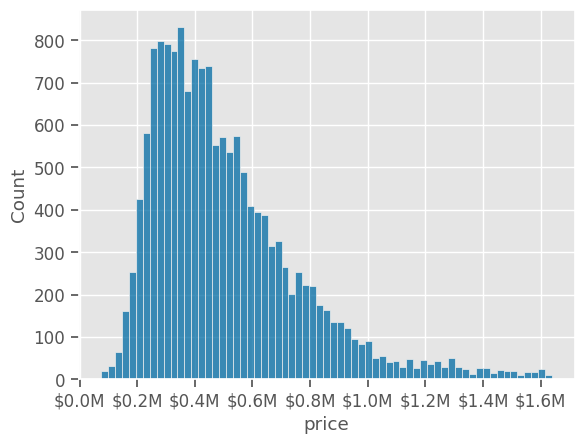

In [275]:
ax = sns.histplot(data=plot_df, x='price')
ax.xaxis.set_major_formatter(price_fmt_mill)

In [276]:

## FROM MY "From linear to logistic regression" mini-lesson (interview)
def plot_feature_vs_target(df,x='sqft_living',y='price',price_format=True, 
                          figsize=(5,4)):
    """Plots a seaborn regplot of x vs y."""
    ax = sns.regplot(data=df,x=x,y=y,
                line_kws=dict(color='k',ls='--',lw=1),
               scatter_kws=dict(s=10,ec='white',lw=1,alpha=0.8)
                    )
    ax.get_figure().set_size_inches(figsize)
    ax.set_title(f'{x} vs {y}')
    
    if price_format:
        ## Formatting Price Axis
        price_fmt = ticker.StrMethodFormatter("${x:,.0f}")
        ax.yaxis.set_major_formatter(price_fmt)
    plt.tight_layout()
    return ax

In [277]:
# X_train_raw.columns

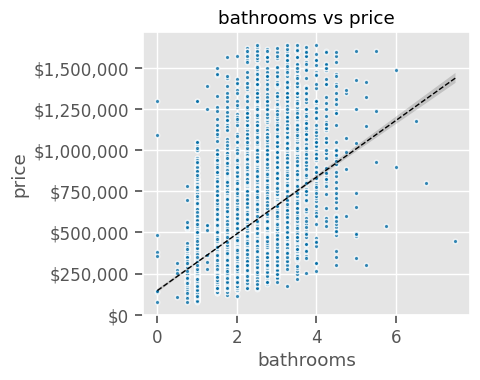

In [278]:
ax=plot_feature_vs_target(plot_df, x='bathrooms',y='price')


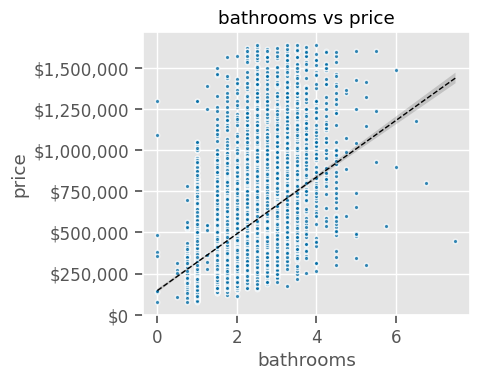

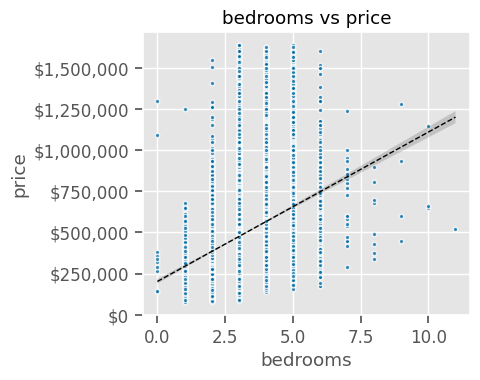

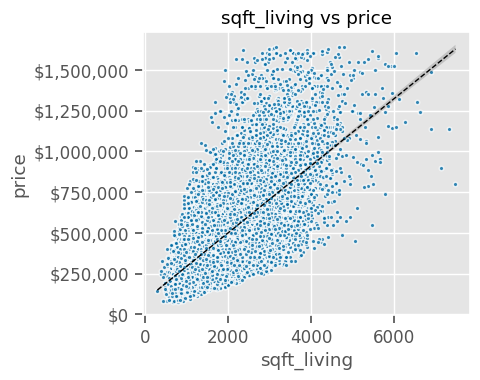

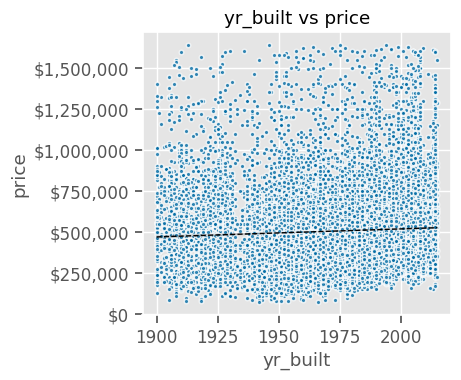

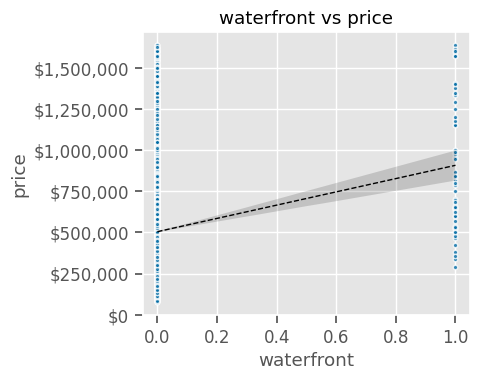

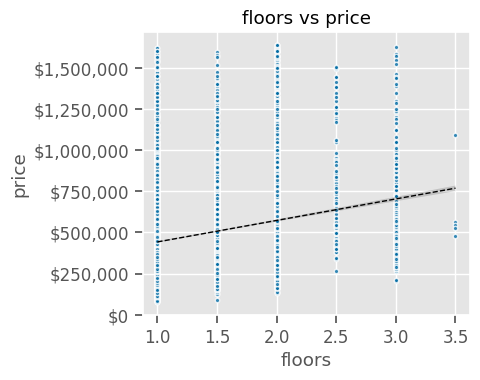

In [279]:
for feature in plot_df.drop(columns='price').columns:
    ax = plot_feature_vs_target(plot_df, x=feature,y='price')
    fig = ax.get_figure()
    fig.savefig(f'../Images/regplot-{feature}-vs-price.png', dpi=300)
    plt.show()

### SLIDE IMAGE: Lin REg

In [280]:
reg_raw = LinearRegression(fit_intercept=True)
reg_raw.fit(X_train_raw,y_train)
display(reg_raw)
evaluate_regression(reg_raw, X_train_raw, y_train, X_test_raw, y_test)

LinearRegression()

In [281]:
def get_coefficients(reg, name='Coefficients'):
    """Save a model's .coef_ and .intercept_ as a Pandas Series"""
    
    coeffs = pd.Series(reg.coef_, 
                       index= reg.feature_names_in_,
                       name=name)
    
    coeffs.loc['Intercept'] = reg.intercept_
    return coeffs

## Saving the coefficients
coeffs = get_coefficients(reg_raw)
coeffs

bathrooms        48,654.2442
bedrooms        -43,470.2626
sqft_living         218.5345
yr_built         -2,623.8721
waterfront      280,693.6622
floors           64,850.5739
Intercept     5,181,319.0298
Name: Coefficients, dtype: float64

In [282]:
coeffs = get_coeffs(reg_raw)
coeffs

bathrooms        48,654.2442
bedrooms        -43,470.2626
sqft_living         218.5345
yr_built         -2,623.8721
waterfront      280,693.6622
floors           64,850.5739
Intercept     5,181,319.0298
dtype: float64

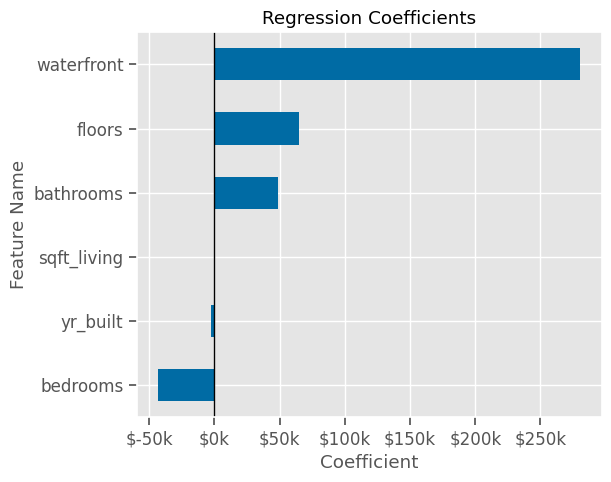

In [283]:
def plot_coefficients(coeffs, figsize=(6,5), title='Regression Coefficients',
                      intercept=True, intercept_name='Intercept',
                      sort_values=True, ascending=True, 
                      ):
    ## Exclude intercept if intercept==False
    if intercept==False:
        if intercept_name in coeffs:
            coeffs = coeffs.drop(intercept_name).copy()
    
    ## Sort values
    if sort_values:
        ceoffs = coeffs.sort_values(ascending=ascending)
 
    ## Plot
    ax = ceoffs.plot(kind='barh',figsize=figsize)
    
    ## Customize Viz 
    ax.axvline(0,color='k', lw=1)
    ax.set(ylabel='Feature Name',xlabel='Coefficient',title=title)
    return ax


ax = plot_coefficients(coeffs, intercept=False)
ax.xaxis.set_major_formatter(price_fmt_thous)

In [284]:
X_train_raw.head(3)

bathrooms  bedrooms  sqft_living   yr_built  waterfront  floors
id                                                                         
2895600090     1.0000    3.0000   1,120.0000 1,954.0000      0.0000  1.0000
8563000110     1.7500    4.0000   1,460.0000 1,967.0000      0.0000  1.0000
2591800340     2.2500    3.0000   1,820.0000 1,983.0000      0.0000  2.0000

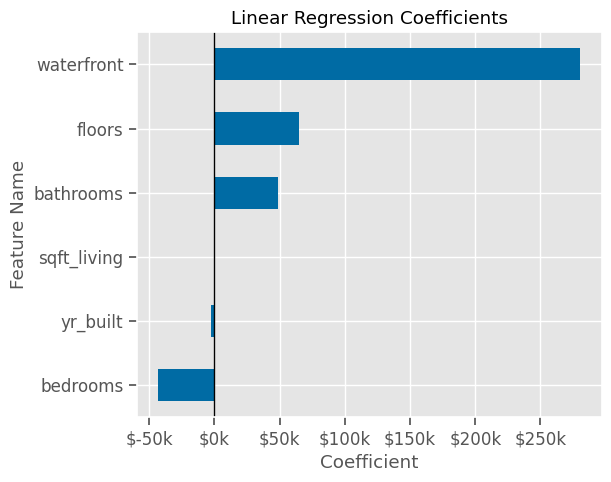

In [285]:
ax = plot_coeffs(reg_raw, intercept=False, title='Linear Regression Coefficients')
ax.xaxis.set_major_formatter(price_fmt_thous)
# lp.annotate_hbars(ax)

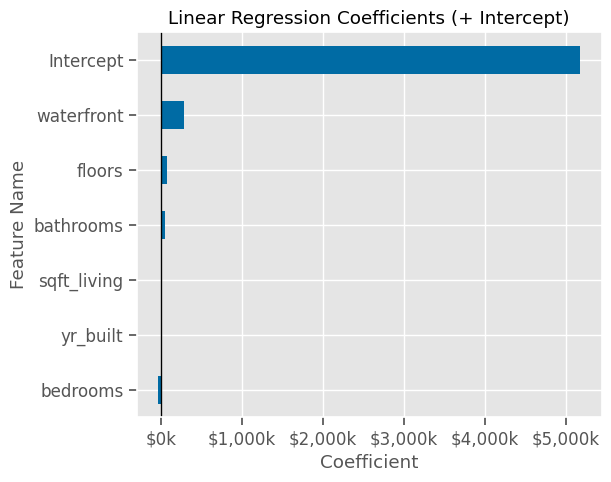

In [286]:
ax = plot_coeffs(reg_raw, intercept=True, title='Linear Regression Coefficients (+ Intercept)')
ax.xaxis.set_major_formatter(price_fmt_thous)
# lp.annotate_hbars(ax)

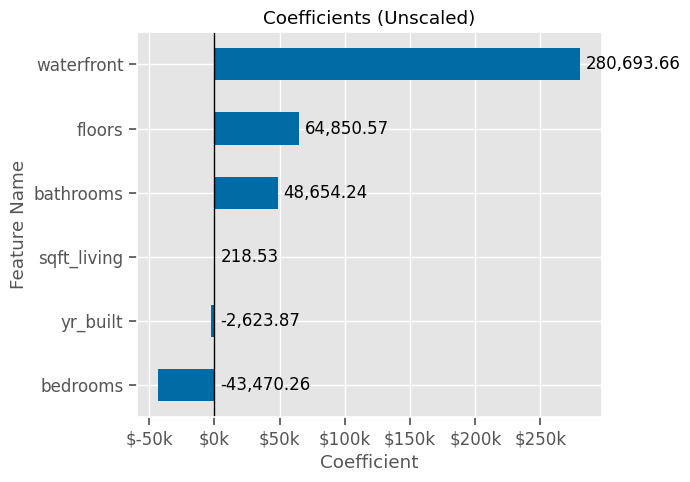

In [287]:
ax = plot_coeffs(reg_raw, intercept=False, title='Coefficients (Unscaled)')
ax.xaxis.set_major_formatter(price_fmt_thous)
lp.annotate_hbars(ax)
ax.get_figure().savefig('../Images/demo-unscaled-coeffs.png', dpi=300)

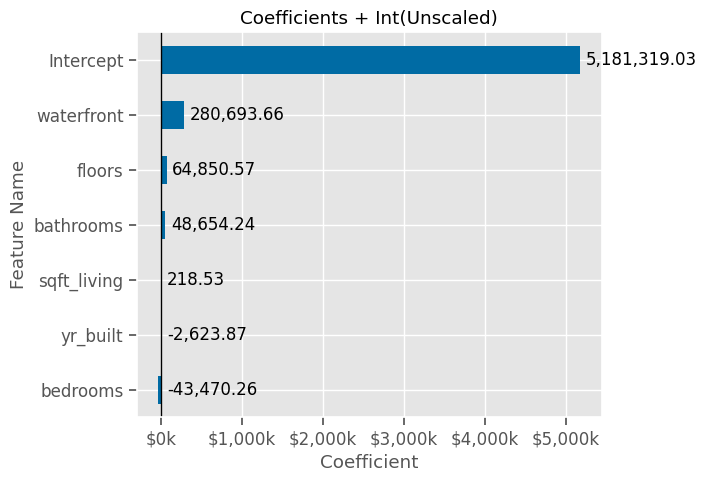

In [288]:
ax = plot_coeffs(reg_raw, intercept=True, title='Coefficients + Int(Unscaled)')
ax.xaxis.set_major_formatter(price_fmt_thous)
lp.annotate_hbars(ax)
ax.get_figure().savefig('../Images/demo-unscaled-coeffs-intercept.png', dpi=300)

In [289]:
get_coefficients(reg_raw, name='Coefficients (Unscaled)')

bathrooms        48,654.2442
bedrooms        -43,470.2626
sqft_living         218.5345
yr_built         -2,623.8721
waterfront      280,693.6622
floors           64,850.5739
Intercept     5,181,319.0298
Name: Coefficients (Unscaled), dtype: float64

### Scaled

In [290]:
num_pipe_scale = make_pipeline( SimpleImputer(strategy='mean'),  
                         StandardScaler()
                        )
preprocessor_scale = make_column_transformer( (num_pipe_scale, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)

preprocessor_scale.fit(X_train)
feature_names_scale = preprocessor_scale.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_scale = pd.DataFrame( preprocessor_scale.transform(X_train), 
                          columns = feature_names_scale,
                         index = X_train.index)

## Prepare X_test_df
X_test_scale = pd.DataFrame( preprocessor_scale.transform(X_test),
                          columns = feature_names_scale,
                         index=X_test.index)
X_train_scale

bathrooms  bedrooms  sqft_living  yr_built  waterfront  floors
id                                                                        
2895600090    -1.4718   -0.3858      -1.0873   -0.5816     -0.0626 -0.9053
8563000110    -0.4557    0.7217      -0.6796   -0.1372     -0.0626 -0.9053
2591800340     0.2218   -0.3858      -0.2480    0.4097     -0.0626  0.9468
7215721330     0.5605   -0.3858      -0.4518    0.9908     -0.0626  0.9468
7502800030     0.8992    0.7217       1.8262    1.4693     -0.0626  0.9468
...               ...       ...          ...       ...         ...     ...
3211200140    -0.1169    0.7217      -0.3679   -0.0005     -0.0626 -0.9053
6381502155    -1.4718   -0.3858      -0.6436   -0.5816     -0.0626 -0.9053
8964800695    -0.4557   -0.3858       0.2436   -0.7525     -0.0626 -0.9053
2320069206    -1.4718   -0.3858      -0.9314   -1.0943     -0.0626  0.0208
624100010      0.5605   -0.3858       1.0829    0.4097     -0.0626  0.0208

[15904 rows x 6 columns]

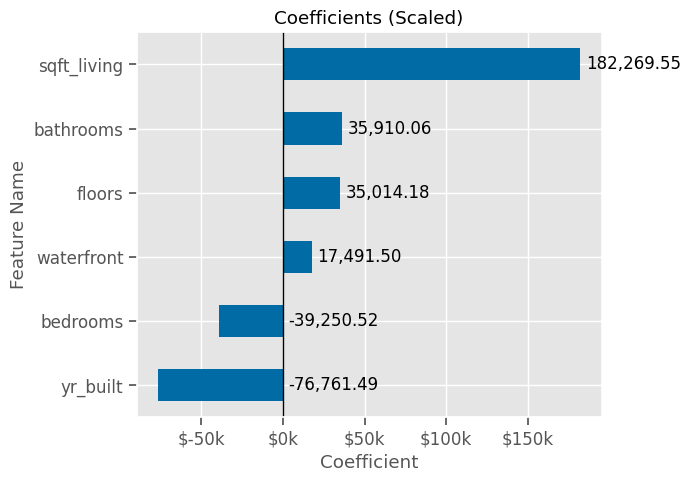

In [291]:
reg_scale = LinearRegression(fit_intercept=True)
reg_scale.fit(X_train_scale,y_train)
evaluate_regression(reg_scale, X_train_scale, y_train, X_test_scale, y_test)

ax = plot_coeffs(reg_scale,intercept=False, title='Coefficients (Scaled)')
ax.xaxis.set_major_formatter(price_fmt_thous)

lp.annotate_hbars(ax)
ax.get_figure().savefig('../Images/demo-scaled-coeffs.png', dpi=300)

In [292]:
get_coefficients(reg_scale, name='Coefficients (Scaled)')

bathrooms      35,910.0566
bedrooms      -39,250.5164
sqft_living   182,269.5485
yr_built      -76,761.4902
waterfront     17,491.5014
floors         35,014.1755
Intercept     506,158.9770
Name: Coefficients (Scaled), dtype: float64

### Getting STD of Features to Interpret Coefficient

In [293]:
std_for_coeffs = np.std(X_train_raw)
std_for_coeffs.name='Standard Deviation'
std_for_coeffs

bathrooms       0.7381
bedrooms        0.9029
sqft_living   834.0538
yr_built       29.2550
waterfront      0.0623
floors          0.5399
Name: Standard Deviation, dtype: float64

### MATPLOTLIB IGNORING FIGSIZE

In [294]:
import matplotlib
matplotlib.__version__

'3.5.3'

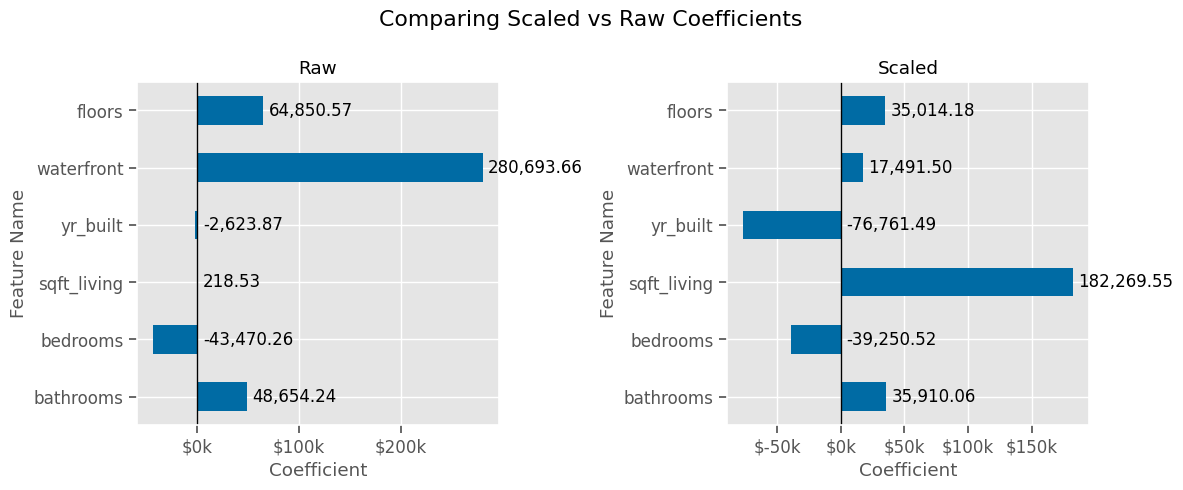

In [295]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))

plot_coeffs(reg_raw, intercept=False,sort_values=False, ax=axes[0])
axes[0].set_title('Raw')
lp.annotate_hbars(axes[0])
axes[0].xaxis.set_major_formatter(price_fmt_thous)

plot_coeffs(reg_scale,intercept=False, sort_values=False,ax=axes[1])
axes[1].set_title('Scaled')
lp.annotate_hbars(axes[1])
axes[1].xaxis.set_major_formatter(price_fmt_thous)
# fig.set_size_inches((18,5))
fig.suptitle("Comparing Scaled vs Raw Coefficients")
fig.tight_layout();
fig.savefig('../Images/demo_raw_scaled_coeffs.png',dpi=300)

### Decision Tree

In [296]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,plot_tree

In [297]:
MAX_DEPTH = 7
reg_tree = DecisionTreeRegressor(max_depth=MAX_DEPTH)#max_depth=MAX_DEPTH)
reg_tree.fit(X_train_raw,y_train)

display(reg_tree)
evaluate_regression(reg_tree, X_train_raw, y_train, 
                    X_test_raw, y_test)

DecisionTreeRegressor(max_depth=7)

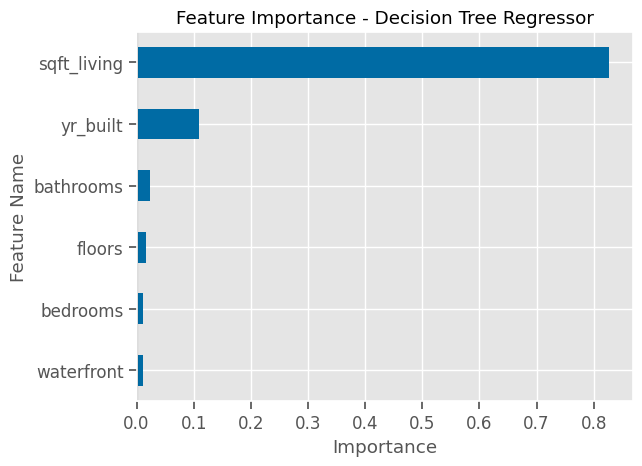

In [298]:
# Saving the coefficients
importances = pd.Series(reg_tree.feature_importances_, index= reg_tree.feature_names_in_)
# coeffs.loc['Intercept'] = reg.intercept_
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - Decision Tree Regressor',ylabel="Feature Name",
      xlabel='Importance');
ax.get_figure().savefig('../Images/feature-importance-tree.png', dpi=300)

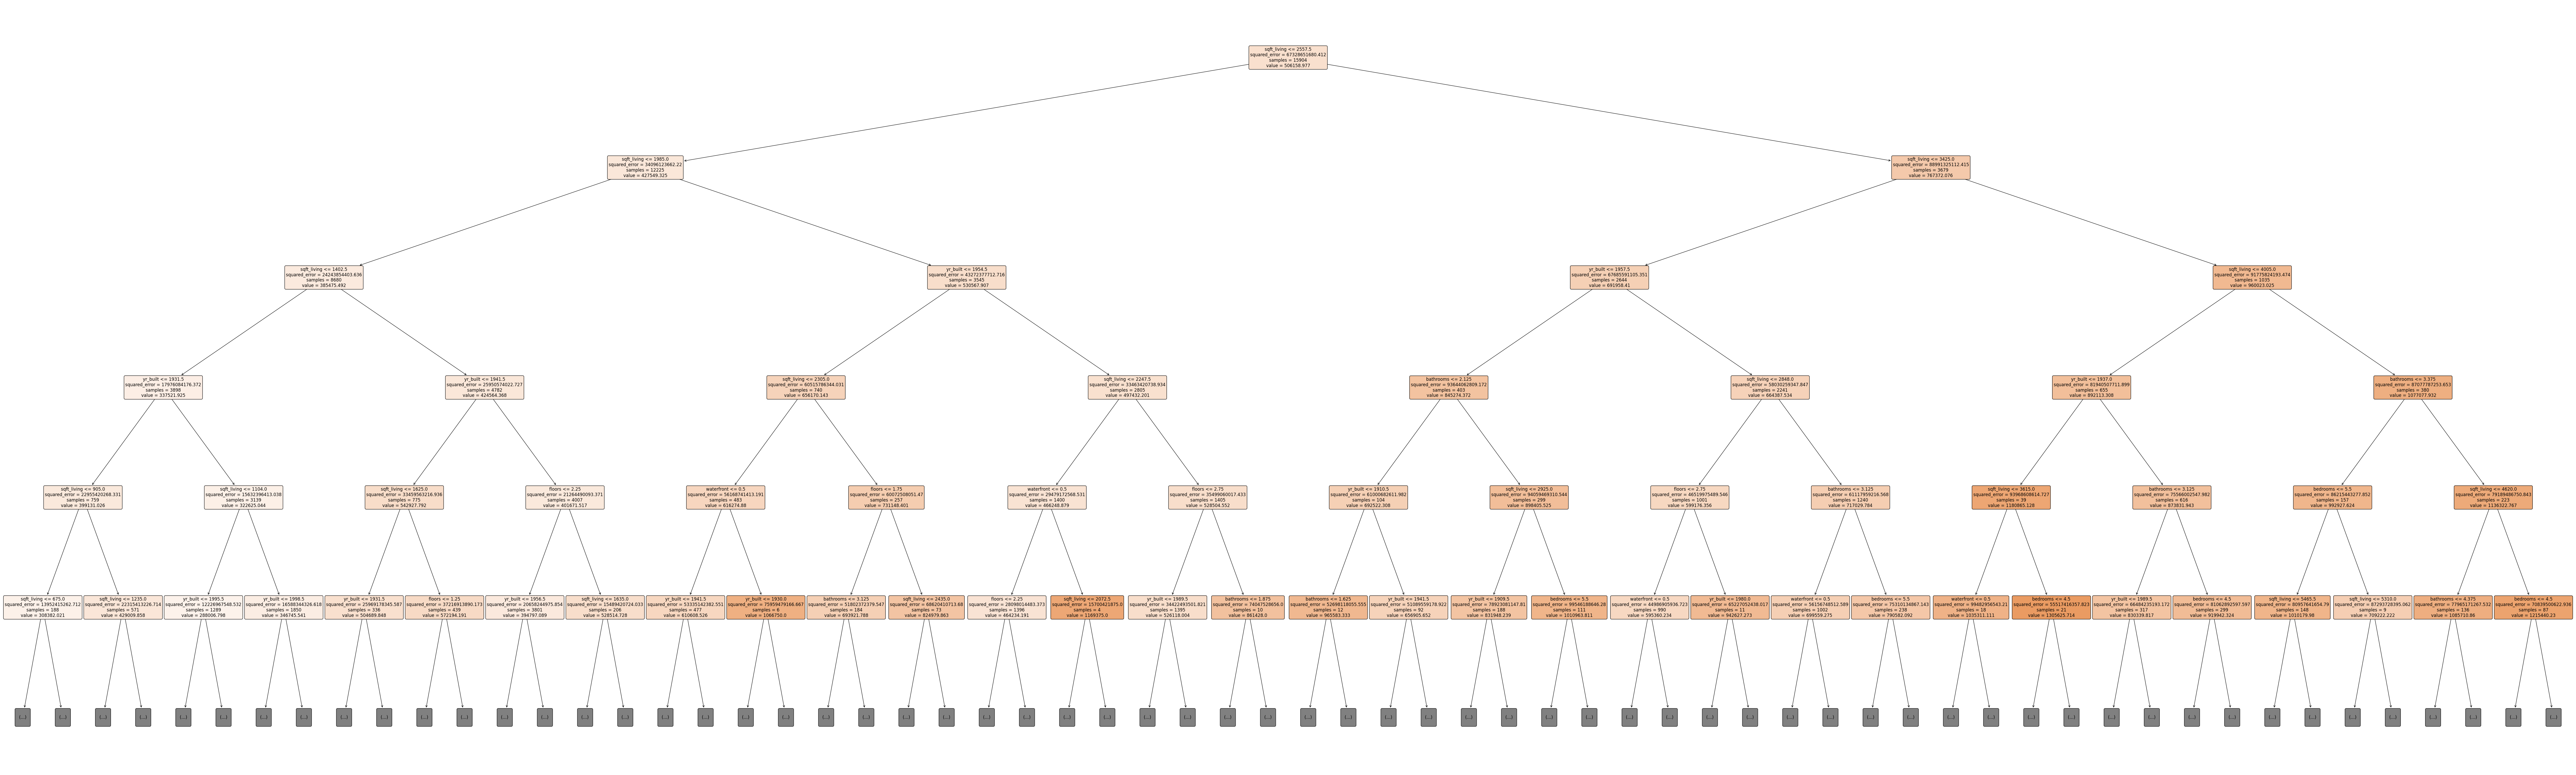

In [299]:
PLOT_DEPTH = 5
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(100,30))
    plot_tree(reg_tree,filled=True,max_depth=PLOT_DEPTH, rounded=True,
              feature_names=reg_tree.feature_names_in_,
             fontsize=12,ax=ax);
    fig.tight_layout()
    
    fig.savefig(f'../Images/plot_tree_demo_depth{PLOT_DEPTH}.png',dpi=150,
               bbox_inches='tight',facecolor='white')

In [300]:
# 2**16

#  Shap (with Regresssion)

In [301]:
# Import and init shap
import shap
shap.initjs()

In [302]:
# Take a sample of the training data
X_shap = shap.sample(X_train_raw,nsamples = 1000,random_state=321)
y_shap = y_train.loc[X_shap.index]

# Instantiate a Model Explainer with the model
explainer = shap.Explainer(reg_tree)
explainer

In [303]:
## Get shap values form the explainer
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [304]:
## nrows, ncols for X_shap
X_shap.shape

(1000, 6)

In [305]:
## nrows, ncols, nclasses for shap_values
shap_values.shape

(1000, 6)

### Shap Explanation Objects

In [306]:
# feature_names

In [307]:
# A single observation/explanation
explanation0 = shap_values[0]
explanation0

.values =
array([ 26496.85802636,   8025.98303327, 282343.81621961, -19126.06789361,
         -621.91918525,   -377.93290158])

.base_values =
array([506158.97698692])

.data =
array([3.250e+00, 4.000e+00, 3.250e+03, 2.014e+03, 0.000e+00, 2.000e+00])

In [308]:
# explanation's .data is just the original X-rows values
display(explanation0.data)
X_shap.iloc[0].values

array([3.250e+00, 4.000e+00, 3.250e+03, 2.014e+03, 0.000e+00, 2.000e+00])

array([3.250e+00, 4.000e+00, 3.250e+03, 2.014e+03, 0.000e+00, 2.000e+00])

In [309]:
explanation0.values

array([ 26496.85802636,   8025.98303327, 282343.81621961, -19126.06789361,
         -621.91918525,   -377.93290158])

In [310]:
explanation0.base_values

array([506158.97698692])

In [311]:
y_train.mean()

506158.9769869215

In [312]:
y_shap.mean()

510694.6207920792

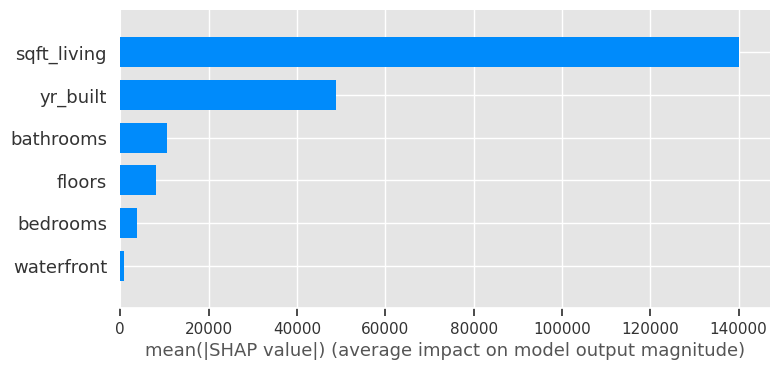

In [313]:
shap.summary_plot(shap_values, 
                  features= X_shap,
                  plot_type='bar')

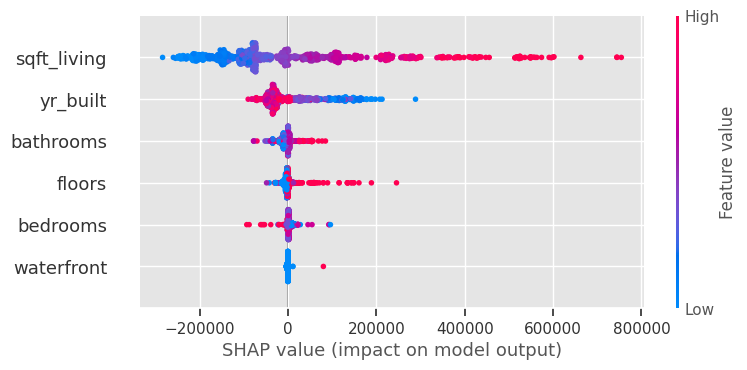

In [314]:
shap.summary_plot(shap_values, features = X_shap)

## Local Explanations

In [315]:
## Making a local vers of X_shap/y_shap with new indices to match shap_values
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

# finding the row with the most bedroms
many_bedrooms= X_shap_local['bedrooms'].idxmax()
X_shap_local.loc[many_bedrooms]

bathrooms         4.0000
bedrooms          7.0000
sqft_living   2,690.0000
yr_built      1,960.0000
waterfront        0.0000
floors            1.0000
Name: 840, dtype: float64

In [316]:
## Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[many_bedrooms].values,
               features=X_shap_local.loc[many_bedrooms])

In [210]:
y_shap_local.loc[many_bedrooms]

450000.0

In [336]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(
    training_data=X_shap_local.values,  
    feature_names=X_shap_local.columns,
   mode='regression')
lime_explainer

In [335]:
exp = lime_explainer.explain_instance(X_shap_local.loc[many_bedrooms],
                               reg_tree.predict)
exp.show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [331]:
# html_viz= exp.as_html()
# with open('../Images/exported-lime-explanation.html','w') as f:
#     f.write(html_viz)

In [329]:
from IPython.display import HTML
HTML(html_viz)

## OLDER CODE BELOW

In [107]:
# Import and init shap
import shap
shap.initjs()

In [ ]:
# Take a sample of the training data
X_shap = shap.sample(X_train_df,nsamples = 500)
y_shap = y_train.loc[X_shap.index]

# Instantiate a Model Explainer with the model
explainer = shap.Explainer(reg_tree)
explainer

In [ ]:
## Get shap values form the explainer
shap_values_reg = explainer(X_shap,y_shap)
type(shap_values_reg)

In [ ]:
## nrows, ncols for X_shap
X_shap.shape

In [ ]:
## nrows, ncols, nclasses for shap_values
shap_values_reg.shape

#### Shap Explanation Objects

In [ ]:
# A single observation/explanation
explanation0 = shap_values_reg[0]
explanation0

In [ ]:
y_shap.iloc[0]

In [ ]:
shap.summary_plot(shap_values_reg,features= X_shap, plot_type='bar')

In [ ]:
shap.summary_plot(shap_values_reg,features= X_shap)

In [ ]:
raise Exception('Working above here!')

### ALT TREE REGRESSION  RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(random_state=3210)
rf_reg.fit(X_train_raw,y_train)
display(rf_reg)
evaluate_regression(rf_reg, X_train_raw, y_train, X_test_raw, y_test)

In [ ]:
depths = [tree.get_depth() for tree in rf_reg.estimators_]
ax = sns.histplot(depths)
ax.set(title='Distribution of Tree Depths from Random Forest',
      xlabel='Depth');

In [ ]:
# Saving the feature importances
importances = pd.Series(rf_reg.feature_importances_, index= rf_reg.feature_names_in_)
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - RandomForestRegressor',ylabel="Feature Name",
      xlabel='Importance');
ax.get_figure().savefig('../Images/feature-importance-forest.png', dpi=300)

# MAIN NOTEBOOK CONTINUE'D

# Pivoting to Classification Task

In [ ]:
def make_target_and_plot(df_ml, THRESH = 1e6):
    df_ml = df_ml.copy()
    df_ml['Expensive'] = df_ml['price'] > THRESH

    grid_spec = {'width_ratios':[0.8,0.2]}
    fig, axes = plt.subplots(ncols=2, gridspec_kw=grid_spec, figsize=(12,3),)

    ax=axes[0]
    sns.boxplot(data=df_ml,x='price',ax=ax)
    ax.axvline(THRESH,color='red',ls='--',label=f"Threshold ${THRESH:,.2f}")
    ax.legend()
    # ax.get_figure().set_size_inches(10,4)


    ax = axes[1]
    ax = sns.countplot(data=df_ml, x='Expensive',ax=ax)

    fig.tight_layout()
    
    return df_ml

In [ ]:
df_ml = make_target_and_plot(df_ml, THRESH=500_000)#THRESH=500_000)
df_ml

In [ ]:
df_ml

In [ ]:
## Make x and y variables
target = 'Expensive'
drop_cols_model = ['zipcode','lat','long','view','price']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_df,y_train)

lp.evaluate_classification_admin(clf, X_train_df, y_train, X_test_df, y_test)

In [ ]:
# Saving the coefficients
importances = pd.Series(clf.feature_importances_, index= clf.feature_names_in_)
# coeffs.loc['Intercept'] = reg.intercept_
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - RandomForestClassifier',ylabel="Feature Name",
      xlabel='Importance');
ax.get_figure().savefig('../Images/feature-importance-forest.png', dpi=300)

In [ ]:
# ax.axvline(0,color='k', lw=1)
# importances

## Model Explainers - SHAP

In [ ]:
# Import and init shap
import shap
shap.initjs()

In [ ]:
# Take a sample of the training data
X_shap = shap.sample(X_train_df,nsamples = 500)
y_shap = y_train.loc[X_shap.index]

# Instantiate a Model Explainer with the model
explainer = shap.Explainer(clf)
explainer

In [ ]:
## Get shap values form the explainer
shap_values = explainer(X_shap,y_shap)
type(shap_values)

In [ ]:
## nrows, ncols for X_shap
X_shap.shape

In [ ]:
## nrows, ncols, nclasses for shap_values
shap_values.shape

### Shap Explanation Objects

In [ ]:
# A single observation/explanation
explanation0 = shap_values[0]
explanation0

In [ ]:
# explanation's .data is just the original X-rows values
X_shap.iloc[0].values

##### TESTING IF MEAN OF PREDICT PROBA IS BASE VALUES

In [ ]:
y_train_pred_proba = clf.predict_proba(X_train_df)
y_train_pred_proba

In [ ]:
explanation0.base_values

In [ ]:
np.mean(y_train_pred_proba,axis=0)

In [ ]:
shap_vals_expensive = shap_values[:,:,1]
shap_vals_expensive.shape

In [ ]:
shap.summary_plot(shap_vals_expensive,features= X_shap, plot_type='bar')

In [ ]:
shap.summary_plot(shap_vals_expensive,X_shap)

In [ ]:
# shap.dependence_plot("yr_built",shap_vals_expensive.values,features=X_shap)

## Part 2 - Time Series

In [ ]:
pd.set_option('display.max_rows',100)

In [ ]:
df['yr_built']

In [ ]:
df['Year Built'] = pd.to_datetime(df['yr_built'],format="%Y")
ts = df.set_index("Year Built")['price'].sort_index()
ts.plot();

In [ ]:
ts_count = ts.resample('Y').count()
ts_count

In [ ]:
ts_count.plot(title ='# of Homes',figsize=(12,3),kind='bar')#style='.-', 

In [ ]:
ts_mean = ts.resample('Y').mean()
ts_mean.plot(style='o-',figsize=(12,3), title='Average Home Value');

In [ ]:
ts_median = ts.resample('Y').median()
ts_median.plot(style='o-',figsize=(12,3), title='Median Home Value');

### TS - Price when sold

In [ ]:
df['Date'] = pd.to_datetime(df['date'])
df_ts = df.set_index("Date").sort_index()
df_ts

In [ ]:
ts = df_ts.resample('D')['price'].mean()
ts.plot()

### how does this compare to typical home values?

In [ ]:
fpath = '../Data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
zillow = pd.read_csv(fpath)
zillow

In [ ]:
zillow.columns

In [ ]:
cut_cols = ["RegionID","SizeRank","RegionType","StateName"]
zillow = zillow.drop(columns=cut_cols)
zillow

In [ ]:
king_county = zillow[zillow['CountyName'] == 'King County']
king_county

In [ ]:
## Specify which columns are identifiers
id_cols = king_county.columns[:5]
id_cols

In [ ]:
# Use pd.melt with the df, the list of id_cols,
pd.melt(king_county, id_vars=id_cols)

In [ ]:
## Use pd.melt and specify names forn value col and var col
melted = pd.melt(king_county, id_vars=id_cols, 
                 value_name='Home Value', var_name="Month")

# Convert Months to Datetime
melted['Month'] = pd.to_datetime(melted['Month'])
melted = melted.set_index('Month')
melted

In [ ]:
king_ts = melted.groupby('RegionName').resample('M')['Home Value'].median()
king_ts

In [ ]:
plot_ts = king_ts.unstack(0)
plot_ts

In [ ]:
ax = plot_ts.plot(figsize=(12,5))
ax.legend(bbox_to_anchor=[1,1])

In [ ]:
plot_kws ={'style':'.-'}
# ax = king_ts.loc[df_ts.index.min():df_ts.index.max()].plot(**plot_kws)

# df_ts.resample('M').mean()['price'].plot(ax=ax, **plot_kws)
# ax.legend()

In [ ]:
# king_ts = melted.groupby('CountyName', as_index=False).resample("M")['Home Value'].mean()#numeric_only=True)
# king_ts
# king_ts.plot();